In [36]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("bigmart.csv")
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [38]:
df.dropna(inplace=True)

In [39]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000
mean,12.898675,0.060700,141.716328,1999.190538,2272.037489
std,4.670973,0.044607,62.420534,7.388800,1497.964740
min,4.555000,0.000000,31.490000,1987.000000,69.243200
25%,8.770000,0.025968,94.409400,1997.000000,1125.202000
50%,12.650000,0.049655,142.979900,1999.000000,1939.808300
75%,17.000000,0.088736,186.614150,2004.000000,3111.616300
max,21.350000,0.188323,266.888400,2009.000000,10256.649000


In [40]:
df["Age"] = 2025 - df["Outlet_Establishment_Year"]

/var/folders/4m/jv9v9h3x5ldcqjljb4m2b8j80000gn/T/ipykernel_7119/305605109.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


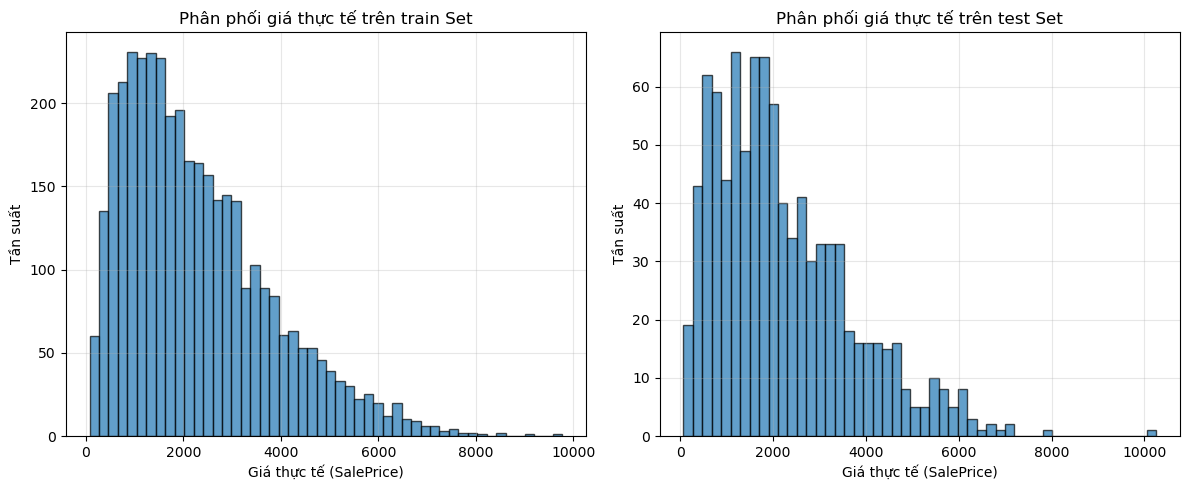

In [41]:
X = df[["Item_Weight", "Item_Visibility", "Item_MRP", "Age"]]
y = df["Item_Outlet_Sales"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  
axs[0].hist(y_train, bins=50, edgecolor='black', alpha=0.7)
axs[0].set_xlabel('Giá thực tế (SalePrice)')
axs[0].set_ylabel('Tần suất')
axs[0].set_title('Phân phối giá thực tế trên train Set')
axs[0].grid(True, alpha=0.3)

axs[1].hist(y_test, bins=50, edgecolor='black', alpha=0.7)
axs[1].set_xlabel('Giá thực tế (SalePrice)')
axs[1].set_ylabel('Tần suất')
axs[1].set_title('Phân phối giá thực tế trên test Set')
axs[1].grid(True, alpha=0.3)

fig.tight_layout()
fig.show()

In [42]:

# import numpy as np
# from sklearn.preprocessing import StandardScaler

# def draw_hist(value, xlabel, title, bins=50):
#     plt.hist(value, bins=bins, edgecolor='black', alpha=0.7)
#     plt.xlabel(xlabel)
#     plt.ylabel('Tần suất')
#     plt.title(title)
#     plt.grid(True, alpha=0.3)
#     plt.show()
    
# draw_hist(X_train["Item_Weight"], "Diện tích sống", "Phân phối diện tích sống ban đầu")

# standard_scaler = StandardScaler()
# X_train_stand = standard_scaler.fit_transform(X_train[["Item_Weight"]])
# X_test_stand = standard_scaler.transform(X_test[["Item_Weight"]])
# draw_hist(X_train_stand, "Diện tích sống", "Phân phối diện tích sống sau khi chuẩn hóa")



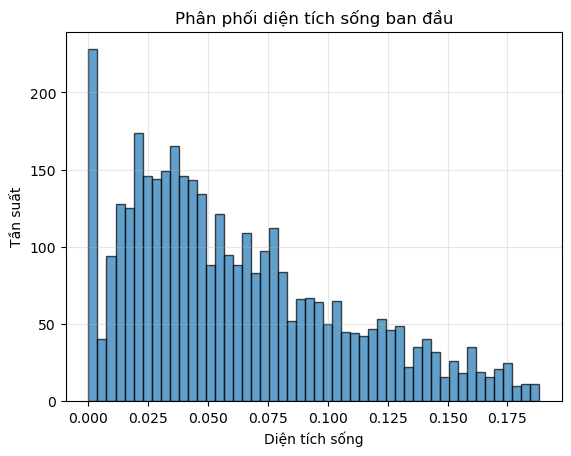

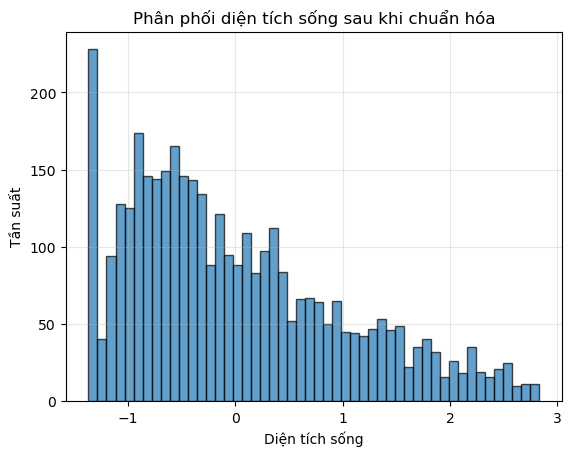

In [43]:

import numpy as np
from sklearn.preprocessing import StandardScaler

def draw_hist(value, xlabel, title, bins=50):
    plt.hist(value, bins=bins, edgecolor='black', alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel('Tần suất')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.show()
    
draw_hist(X_train["Item_Visibility"], "Diện tích sống", "Phân phối diện tích sống ban đầu")

standard_scaler = StandardScaler()
X_train_stand = standard_scaler.fit_transform(X_train[["Item_Visibility"]])
X_test_stand = standard_scaler.transform(X_test[["Item_Visibility"]])
draw_hist(X_train_stand, "Diện tích sống", "Phân phối diện tích sống sau khi chuẩn hóa")



In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import numpy as np


X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['Item_Weight','Item_Visibility','Item_MRP','Age']

# apply standardization on numerical features
for i in num_cols:

    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])

    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])

    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])
    
    norm = MinMaxScaler()
    X_train_norm[i] = norm.fit_transform(X_train_norm[[i]])
    X_test_norm[i] = norm.transform(X_test_norm[[i]])
    
    



In [45]:
# training a KNN model
from sklearn.neighbors import KNeighborsRegressor
# measuring RMSE score
from sklearn.metrics import mean_squared_error

# knn 


rmse = []

# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):
    knn = KNeighborsRegressor(n_neighbors=7)
    # fit
    knn.fit(trainX[i],y_train)
    # predict
    pred = knn.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result
df_knn = pd.DataFrame({'RMSE':rmse},index=['Original','Normalized','Standardized'])
df_knn

,RMSE
Original,1131.134278
Normalized,1102.020801
Standardized,1108.085516


In [48]:
# Linear Regression
from sklearn.linear_model import LinearRegression
test_rmse = []
train_rmse = []
import time
# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # Create and fit the model
    model = LinearRegression()
    start_time = time.time()
    model.fit(trainX[i], y_train)
    end_time = time.time()
    print(f"Time taken to fit the model: {end_time - start_time} seconds")
    # predict
    pred = model.predict(testX[i])
    train_pred = model.predict(trainX[i])   
    # RMSE
    test_rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,train_pred)    ))
print(pd.DataFrame({'RMSE':train_rmse},index=['Original_train','Normalized_train','Standardized_train']))
print(pd.DataFrame({'RMSE':test_rmse},index=['Original_test','Normalized_test','Standardized_test']))


Time taken to fit the model: 0.029094219207763672 seconds
Time taken to fit the model: 0.013259172439575195 seconds
Time taken to fit the model: 0.0008029937744140625 seconds
                           RMSE
Original_train      1108.784904
Normalized_train    1108.784904
Standardized_train  1108.784904
                          RMSE
Original_test      1047.222791
Normalized_test    1047.222791
Standardized_test  1047.222791
